In [1]:
import pandas as pd

C:\Users\Rv\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("D:\economic_index.csv")

In [4]:
df.head(5)

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [5]:
df.drop(columns="Unnamed: 0",axis=1,inplace=True)

In [6]:
df.head()

,year,month,interest_rate,unemployment_rate,index_price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


In [7]:
df.drop(columns=["year","month"],axis=1,inplace=True)

In [8]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [9]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


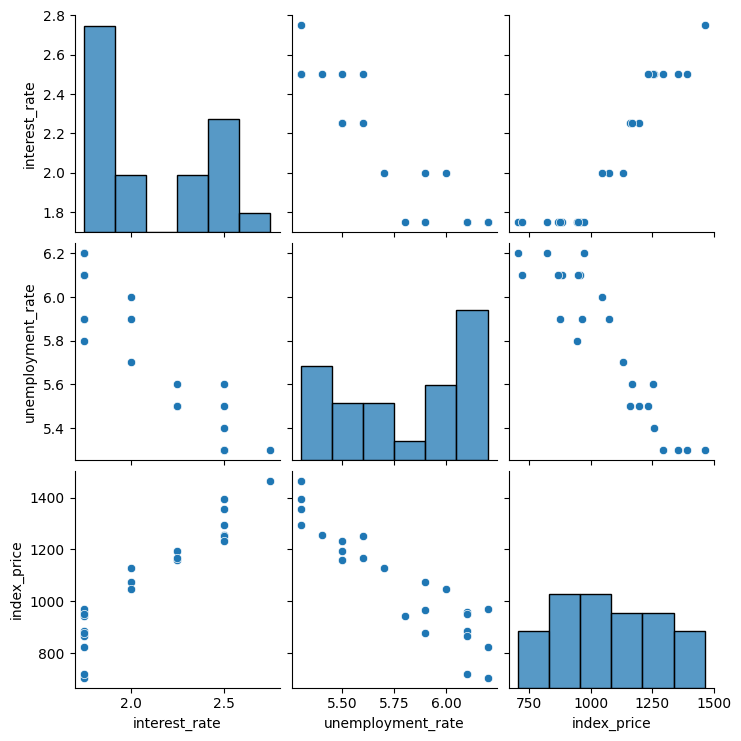

In [10]:
sns.pairplot(df)

In [11]:
corr_matrix=df.corr()
corr_matrix

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


<Axes: >

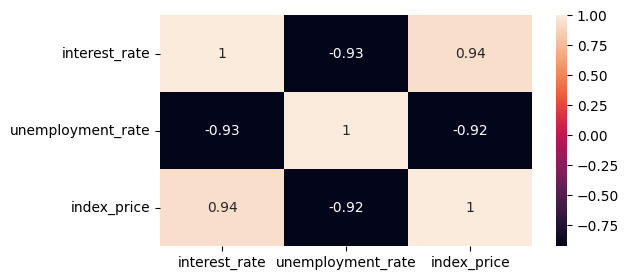

In [12]:
plt.figure(figsize=(6,3))
sns.heatmap(data=corr_matrix,annot=True)#corelation

Text(0, 0.5, 'index_price')

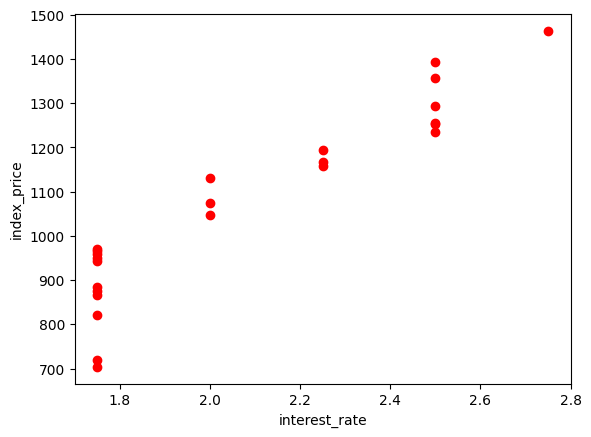

In [13]:
plt.scatter(df["interest_rate"],df["index_price"],color="r")
plt.xlabel("interest_rate")
plt.ylabel("index_price")

Text(0, 0.5, 'unemployment_rate')

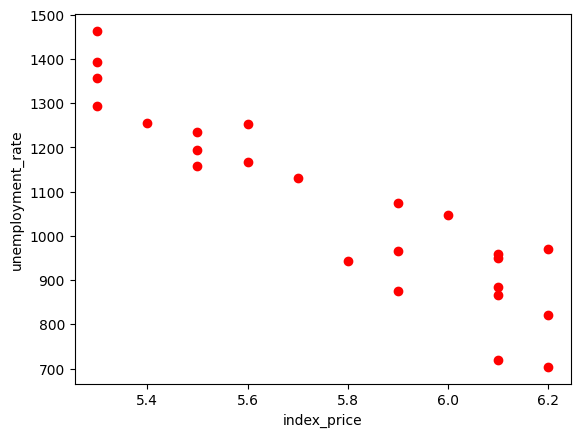

In [14]:
plt.scatter(df["unemployment_rate"],df["index_price"],color="r")
plt.xlabel("index_price")
plt.ylabel("unemployment_rate")

In [15]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [16]:
x.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [29]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=42)

In [30]:
xtrain.head()

,interest_rate,unemployment_rate
13,1.75,5.9
1,2.50,5.3
21,1.75,6.2
5,2.50,5.6
2,2.50,5.3


In [31]:
ytest

8     1159
16     971
0     1464
18     884
11    1075
9     1167
Name: index_price, dtype: int64

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler=StandardScaler()

In [34]:
xtrain=scaler.fit_transform(xtrain)

In [35]:
xtest=scaler.fit_transform(xtest)

In [36]:
xtrain

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [37]:
xtest

array([[ 0.36115756, -0.82078268],
       [-1.08347268,  1.33377186],
       [ 1.8057878 , -1.43636969],
       [-1.08347268,  1.02597835],
       [-0.36115756,  0.41039134],
       [ 0.36115756, -0.51298918]])

In [38]:
ytrain

13     965
1     1394
21     822
5     1254
2     1357
12    1047
15     958
3     1293
4     1256
22     704
17     949
20     876
23     719
7     1195
10    1130
14     943
19     866
6     1234
Name: index_price, dtype: int64

In [39]:
print("xtrain count:",len(xtrain),"and percentage:",(len(xtrain)/len(x))*100)
print("xtest count:",len(xtest),"and percentage:",(len(xtest)/len(x))*100)
print("ytrain count:",len(ytrain),"and percentage:",(len(ytrain)/len(y))*100)
print("ytest count:",len(ytest),"and percentage:",(len(ytest)/len(y))*100)

xtrain count: 18 and percentage: 75.0
xtest count: 6 and percentage: 25.0
ytrain count: 18 and percentage: 75.0
ytest count: 6 and percentage: 25.0


In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
li=LinearRegression()

In [42]:
li.fit(xtrain,ytrain)

LinearRegression()

In [43]:
li.coef_

array([  88.27275507, -116.25716066])

In [44]:
li.intercept_

1053.4444444444443

In [45]:
from sklearn.model_selection import cross_val_score

In [46]:
validation=cross_val_score(li,xtrain,ytrain,scoring='neg_mean_squared_error',
                                cv=3)

In [47]:
np.mean(validation)

-5914.82818016239

In [48]:
ypred=li.predict(xtest)

In [49]:
ypred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [50]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [51]:
print("MSE--",mean_absolute_error(ytest,ypred))
print("MAE--",mean_squared_error(ytest,ypred))

MSE-- 73.80444932337097
MAE-- 8108.567426306604


In [52]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(ytest,ypred)
mae=mean_absolute_error(ytest,ypred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306604
73.80444932337097
90.04758423359621


In [57]:
print('Accuracy on Training data:',li.score(xtrain, ytrain) )
print('Accuracy on Test data:',li.score(xtest, ytest) )

Accuracy on Training data: 0.9030782287244159
Accuracy on Test data: 0.7591371539010257
